### Fase 1: Exploración y Limpieza

    1. Exploración Inicial:

In [1]:
# Importo las librerias necesarias para la exploración inicial de los archivos:

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [153]:
# Leo los archivos y lo paso a Dataframe's:

df_fa = pd.read_csv('Customer Flight Activity.csv', index_col=False)
df_lh = pd.read_csv('Customer Loyalty History.csv', index_col=False)

In [ ]:
# Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
# nulos, atípicos o datos faltantes en las columnas relevantes.

# Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
# presencia de valores nulos y estadísticas básicas de las columnas involucradas.

# Creo una función básica para hacer un Análisis Exploratorio de los Datos con varias funciones de 
# pandas para la extracción de información:

def eda (df):
    print('Filas iniciales:')
    display(df.head(3))
    print('----------------------------------------------------------------------------------')
    print('Filas finales:')
    display(df.tail(3))
    print('----------------------------------------------------------------------------------')    
    print('Filas aleatorias:')
    display(df.sample(3))
    print('----------------------------------------------------------------------------------')
    print('Número de filas:')
    display(df.shape[0])
    print('----------------------------------------------------------------------------------')
    print('Número de columnas:')
    display(df.shape[1])
    print('----------------------------------------------------------------------------------')
    print('Información dataframe:')
    display(df.info())
    print('----------------------------------------------------------------------------------')
    print('Nombre de las columnas:')
    display(df.columns)
    print('----------------------------------------------------------------------------------')
    # Saco 1o las col numéricas para que, en el caso de que no haya, no de error con el siguiente código:
    columnas_num = df.select_dtypes(include='number')
    if not columnas_num.empty:
        print('Descripción datos numéricos:')
        display(columnas_num.describe().T)
    else:
        print('No hay datos de tipo numérico')
    print('----------------------------------------------------------------------------------')
    # Saco 1o las col categóricas para que, en el caso de que no haya, no de error con el siguiente código:
    columnas_str = df.select_dtypes(include='object')
    if not columnas_str.empty:
        print('Descripción datos string:')
        display(columnas_str.describe().T)
    else:
        print('No hay datos de tipo string')
    print('----------------------------------------------------------------------------------')
    # Saco 1o las col de fechas para que, en el caso de que no haya, no de error con el siguiente código:
    columnas_fecha = df.select_dtypes(include='datetime')
    if not columnas_fecha.empty:
        print('Descripción datos fechas:')
        display(columnas_fecha.describe().T)
    else:
        print('No hay datos de tipo fechas')
    print('----------------------------------------------------------------------------------')
    print('Cuantos datos únicos hay por columna:')
    display(df.nunique())
    print('----------------------------------------------------------------------------------')
    # Itero por cada columna para mostrar los valores únicos y la frecuencia de cada uno:
    for col in df.columns:
        print(f'Datos unicos de la {col}:\n {df[col].value_counts()}\n')
    print('----------------------------------------------------------------------------------')
    print('Cuantos datos nulos hay:')
    display(df.isnull().sum())
    print('----------------------------------------------------------------------------------')
    # Saco los porcentajes de nulos de cada tipo de dato y lo muestro por cada columna de ese tipo:
    porcentajes_nulos = df.isnull().mean() * 100
    cols_numericas = df.select_dtypes(include=['number']).columns
    cols_categoricas = df.select_dtypes(include=['object', 'category']).columns
    cols_fechas = df.select_dtypes(include=['datetime']).columns
    nulos_numericas = porcentajes_nulos[cols_numericas]
    nulos_categoricas = porcentajes_nulos[cols_categoricas]
    nulos_fechas = porcentajes_nulos[cols_fechas]
    if (porcentajes_nulos > 0).any():
        if (nulos_numericas > 0).any():
            print('Porcentajes de nulos en columnas numéricas:')
            print(nulos_numericas.sort_values(ascending=False))
        else:
            print('No hay nulos en columnas numéricas.')
            print('----------------------------------------------------------------------------------')
        if (nulos_categoricas > 0).any():
            print('\nPorcentajes de nulos en columnas categóricas:')
            print(nulos_categoricas.sort_values(ascending=False))
        else:
            print('No hay nulos en columnas categóricas.')
            print('----------------------------------------------------------------------------------')
        if (nulos_fechas > 0).any():
            print('\nPorcentajes de nulos en columnas de fechas:')
            print(nulos_fechas.sort_values(ascending=False))
        else:
            print('No hay nulos en columnas de fechas.')
    else:
        pass
    print('----------------------------------------------------------------------------------')
    # Saco 1o la cantidad general de duplicados y, si hay, muestro las tres primeras:
    cantid_duplicadas = df.duplicated().sum()
    print(f'Cantidad de duplicados: {cantid_duplicadas}')
    if cantid_duplicadas >0:
        print('Primeros duplicados:')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('------------------------------------------------------------------------------------')
    # Saco las columnas que solo tengan un valor, si hay, muestro cual/es son:
    print('Columnas constantes (solo 1 valor único):')
    constantes = df.columns[df.nunique() <= 1]
    if len(constantes) > 0:
        print(f'{len(constantes)} columnas con 1 valor único:')
        display(constantes)
    else:
        print('No hay columnas constantes')
    print('------------------------------------------------------------------------------------')
    # Muestro un histograma de las columnas numéricas para ver la tendencia y los outliers (aunque se ven mejor en un boxplot, aquí también se aprecian):
    print('Distribución de las columnas numéricas:')
    # Creo histogramas automáticamente:
    axes = df.hist(bins=20, figsize=(25, 25), color='#005BBB')
    # Creo una variable de la figura para modificar el color:
    fig = plt.gcf()  # gcf = get current figure
    # Cambio el fondo de la figura:
    fig.patch.set_facecolor('#E6F2FF')
    # Aseguro que axes es un array plano para recorrerlo fácilmente:
    axes = axes.flatten()
    # Personalizo los gráficos:
    for ax in axes:
        ax.set_facecolor('#CCE5FF')  # Fondo del gráfico  
        ax.title.set_fontsize(18)
        ax.tick_params(colors='#003366')  # Color ejes 
        ax.grid(color='#6699CC', linestyle='--', linewidth=0.5)  # Color y estilo de cuadrícula 
        for spine in ax.spines.values():  # Bordes
            spine.set_color('#003366')
    plt.tight_layout() # Para ajustar automáticamente el espaciado entre los gráficos
    plt.show()

La información general de Flight Activity es:
Filas iniciales:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


----------------------------------------------------------------------------------
Filas finales:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


----------------------------------------------------------------------------------
Filas aleatorias:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
103912,235428,2017,7,14,0,14,1316,131.0,0,0
97054,765428,2017,6,16,2,18,5256,525.0,0,0
23907,473775,2017,2,11,0,11,1353,135.0,0,0


----------------------------------------------------------------------------------
Número de filas:


405624

----------------------------------------------------------------------------------
Número de columnas:


10

----------------------------------------------------------------------------------
Información dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

----------------------------------------------------------------------------------
Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

----------------------------------------------------------------------------------
Descripción datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


----------------------------------------------------------------------------------
No hay datos de tipo string
----------------------------------------------------------------------------------
No hay datos de tipo fechas
----------------------------------------------------------------------------------
Cuantos datos únicos hay por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

----------------------------------------------------------------------------------
Datos unicos de la Loyalty Number:
 Loyalty Number
678205    72
499874    48
411734    48
255475    48
528447    48
          ..
100590    24
100642    24
100644    24
100646    24
999891    24
Name: count, Length: 16737, dtype: int64

Datos unicos de la Year:
 Year
2017    202812
2018    202812
Name: count, dtype: int64

Datos unicos de la Month:
 Month
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: count, dtype: int64

Datos unicos de la Flights Booked:
 Flights Booked
0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

Datos unicos de la Flight

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
Cantidad de duplicados: 1864
Primeros duplicados:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0


------------------------------------------------------------------------------------
Columnas constantes (solo 1 valor único):
No hay columnas constantes
------------------------------------------------------------------------------------
Distribución de las columnas numéricas:


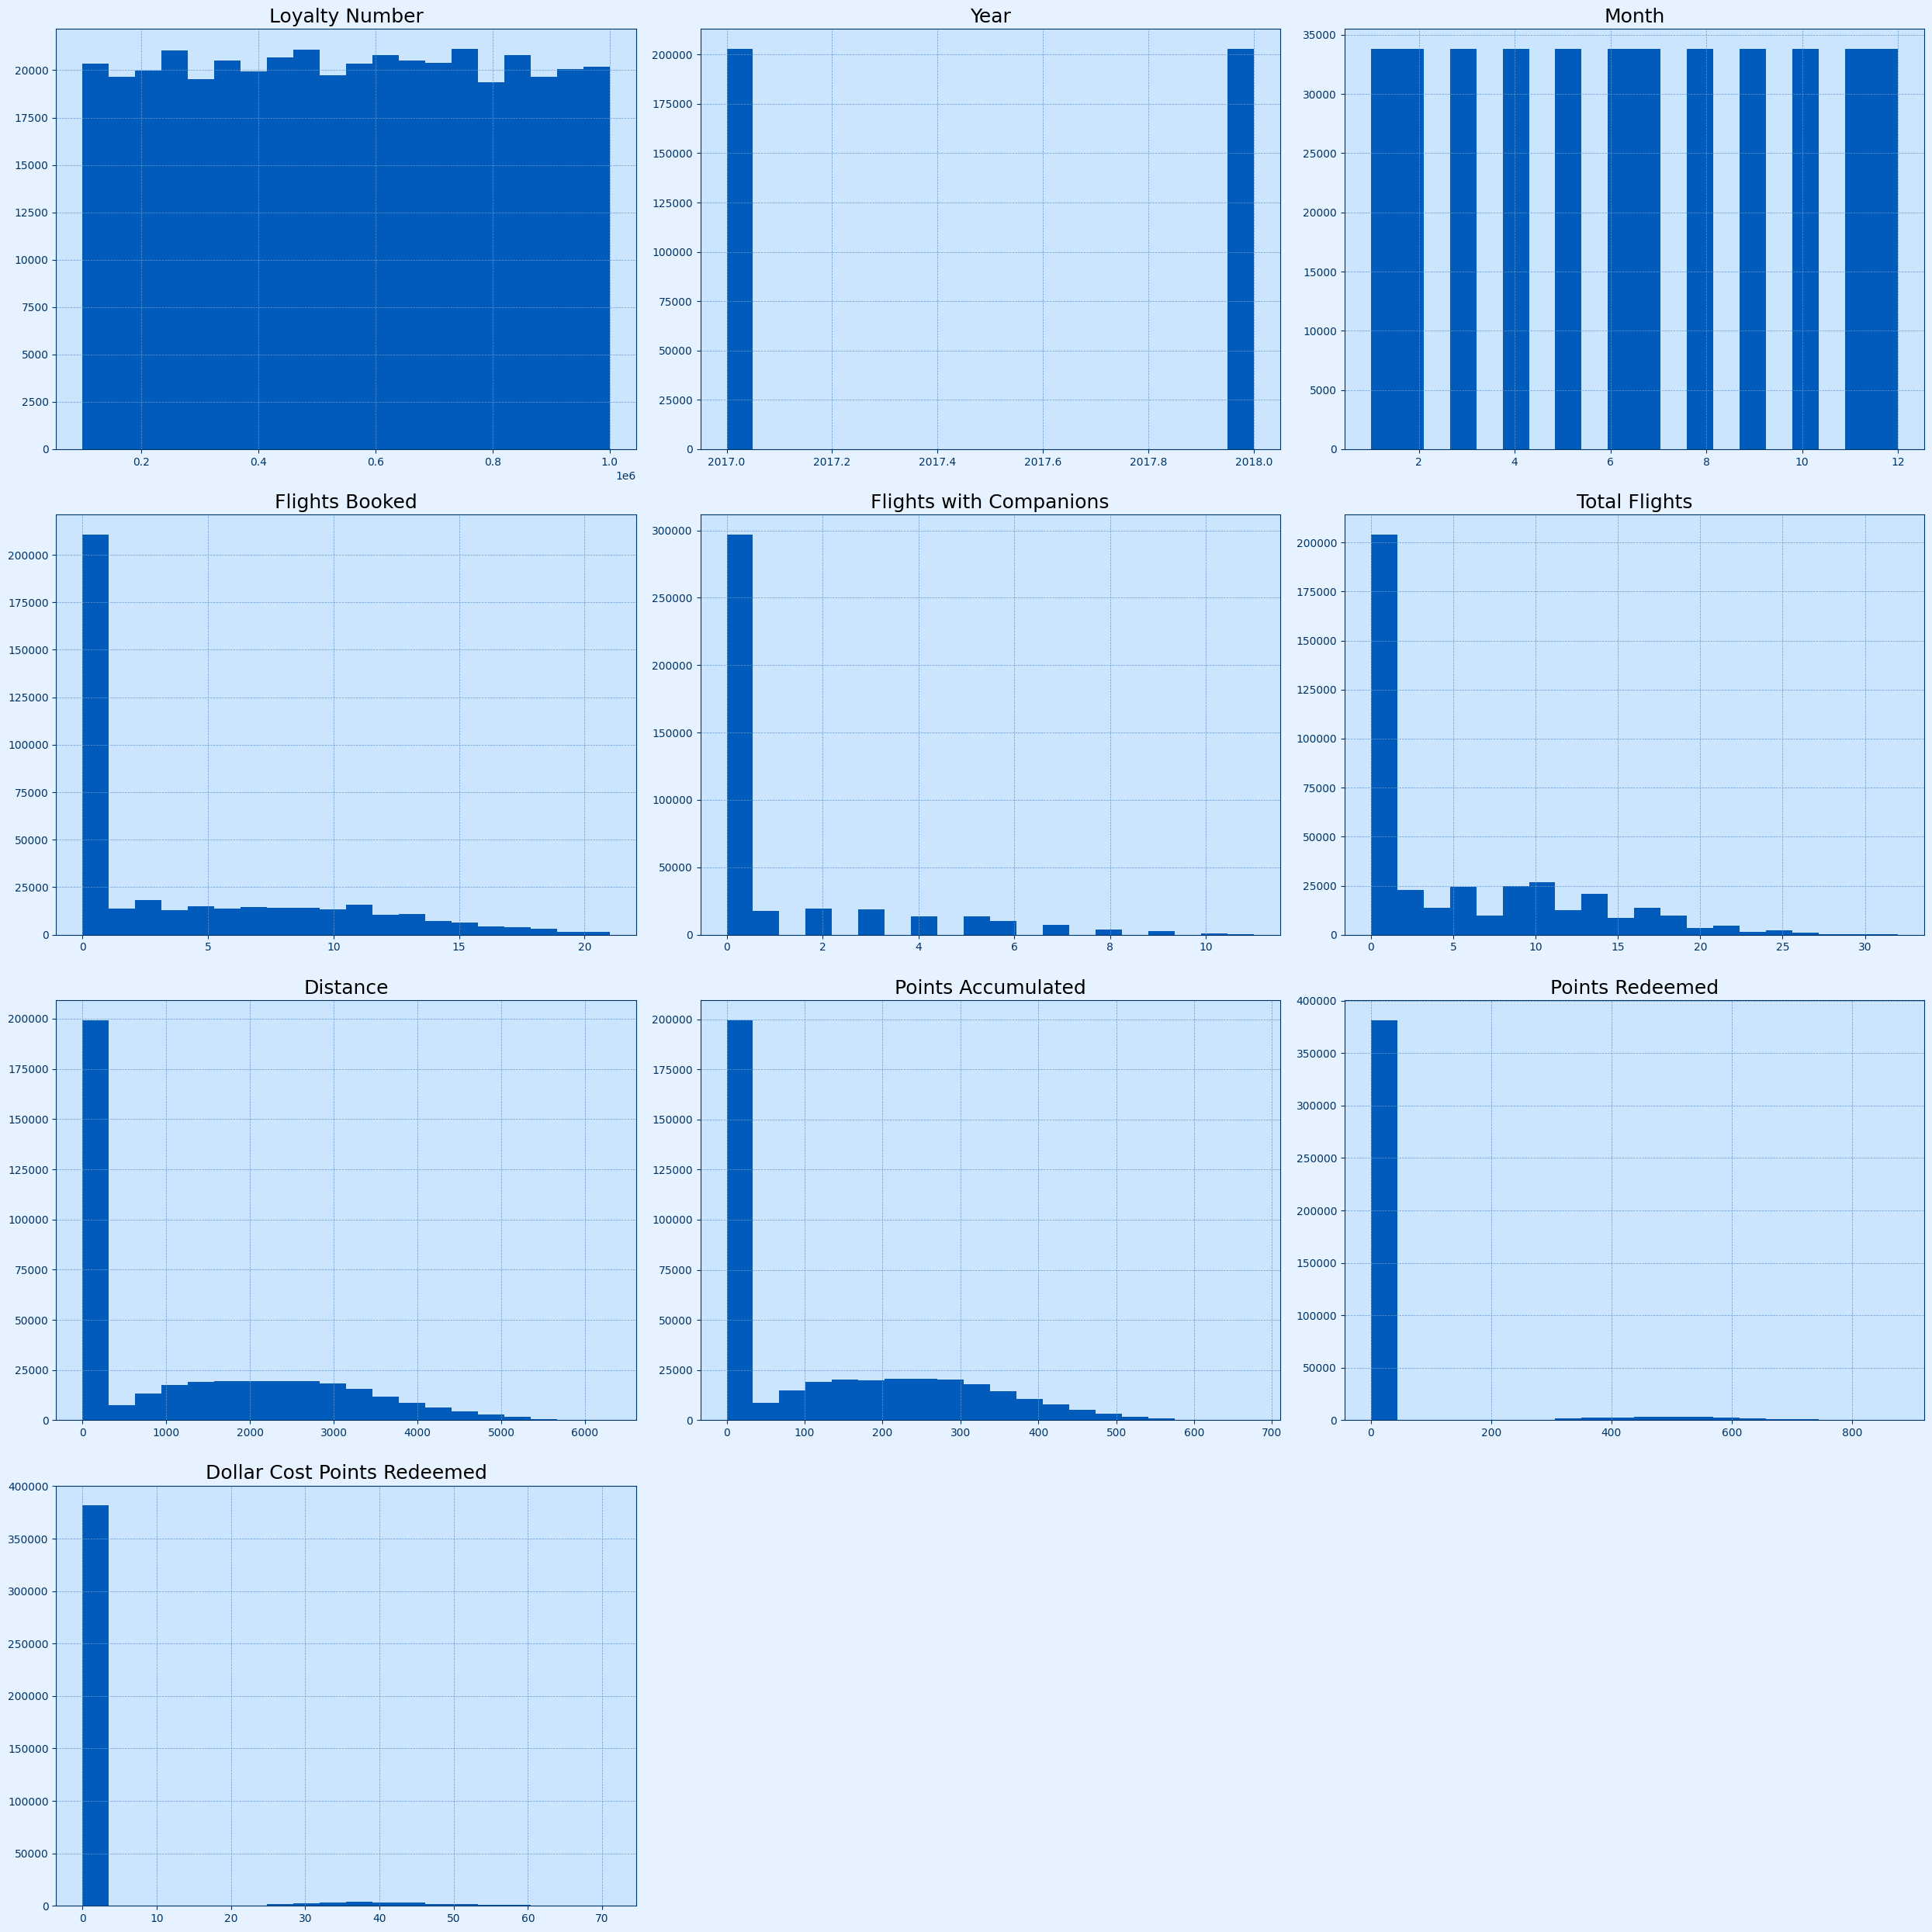

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
La información general de Loyalty History es:
Filas iniciales:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


----------------------------------------------------------------------------------
Filas finales:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


----------------------------------------------------------------------------------
Filas aleatorias:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
4982,710005,Canada,Quebec,Montreal,H4G 3T4,Male,Doctor,81863.0,Married,Nova,3323.86,Standard,2016,7,NaN,NaN
12351,960629,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,57559.0,Married,Star,3635.03,Standard,2013,4,NaN,NaN
1405,633734,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,53661.0,Married,Aurora,5728.58,Standard,2017,7,2018.0,3.0


----------------------------------------------------------------------------------
Número de filas:


16737

----------------------------------------------------------------------------------
Número de columnas:


16

----------------------------------------------------------------------------------
Información dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 

None

----------------------------------------------------------------------------------
Nombre de las columnas:


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

----------------------------------------------------------------------------------
Descripción datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


----------------------------------------------------------------------------------
Descripción datos string:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


----------------------------------------------------------------------------------
No hay datos de tipo fechas
----------------------------------------------------------------------------------
Cuantos datos únicos hay por columna:


Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

----------------------------------------------------------------------------------
Datos unicos de la Loyalty Number:
 Loyalty Number
652627    1
118864    1
310700    1
795743    1
702528    1
         ..
193662    1
530508    1
608370    1
429460    1
549612    1
Name: count, Length: 16737, dtype: int64

Datos unicos de la Country:
 Country
Canada    16737
Name: count, dtype: int64

Datos unicos de la Province:
 Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64

Datos unicos de la City:
 City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton    

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

----------------------------------------------------------------------------------
Porcentajes de nulos en columnas numéricas:
Cancellation Month    87.650117
Cancellation Year     87.650117
Salary                25.321145
CLV                    0.000000
Loyalty Number         0.000000
Enrollment Month       0.000000
Enrollment Year        0.000000
dtype: float64
No hay nulos en columnas categóricas.
----------------------------------------------------------------------------------
No hay nulos en columnas de fechas.
----------------------------------------------------------------------------------
Cantidad de duplicados: 0
No hay duplicados
------------------------------------------------------------------------------------
Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

------------------------------------------------------------------------------------
Distribución de las columnas numéricas:


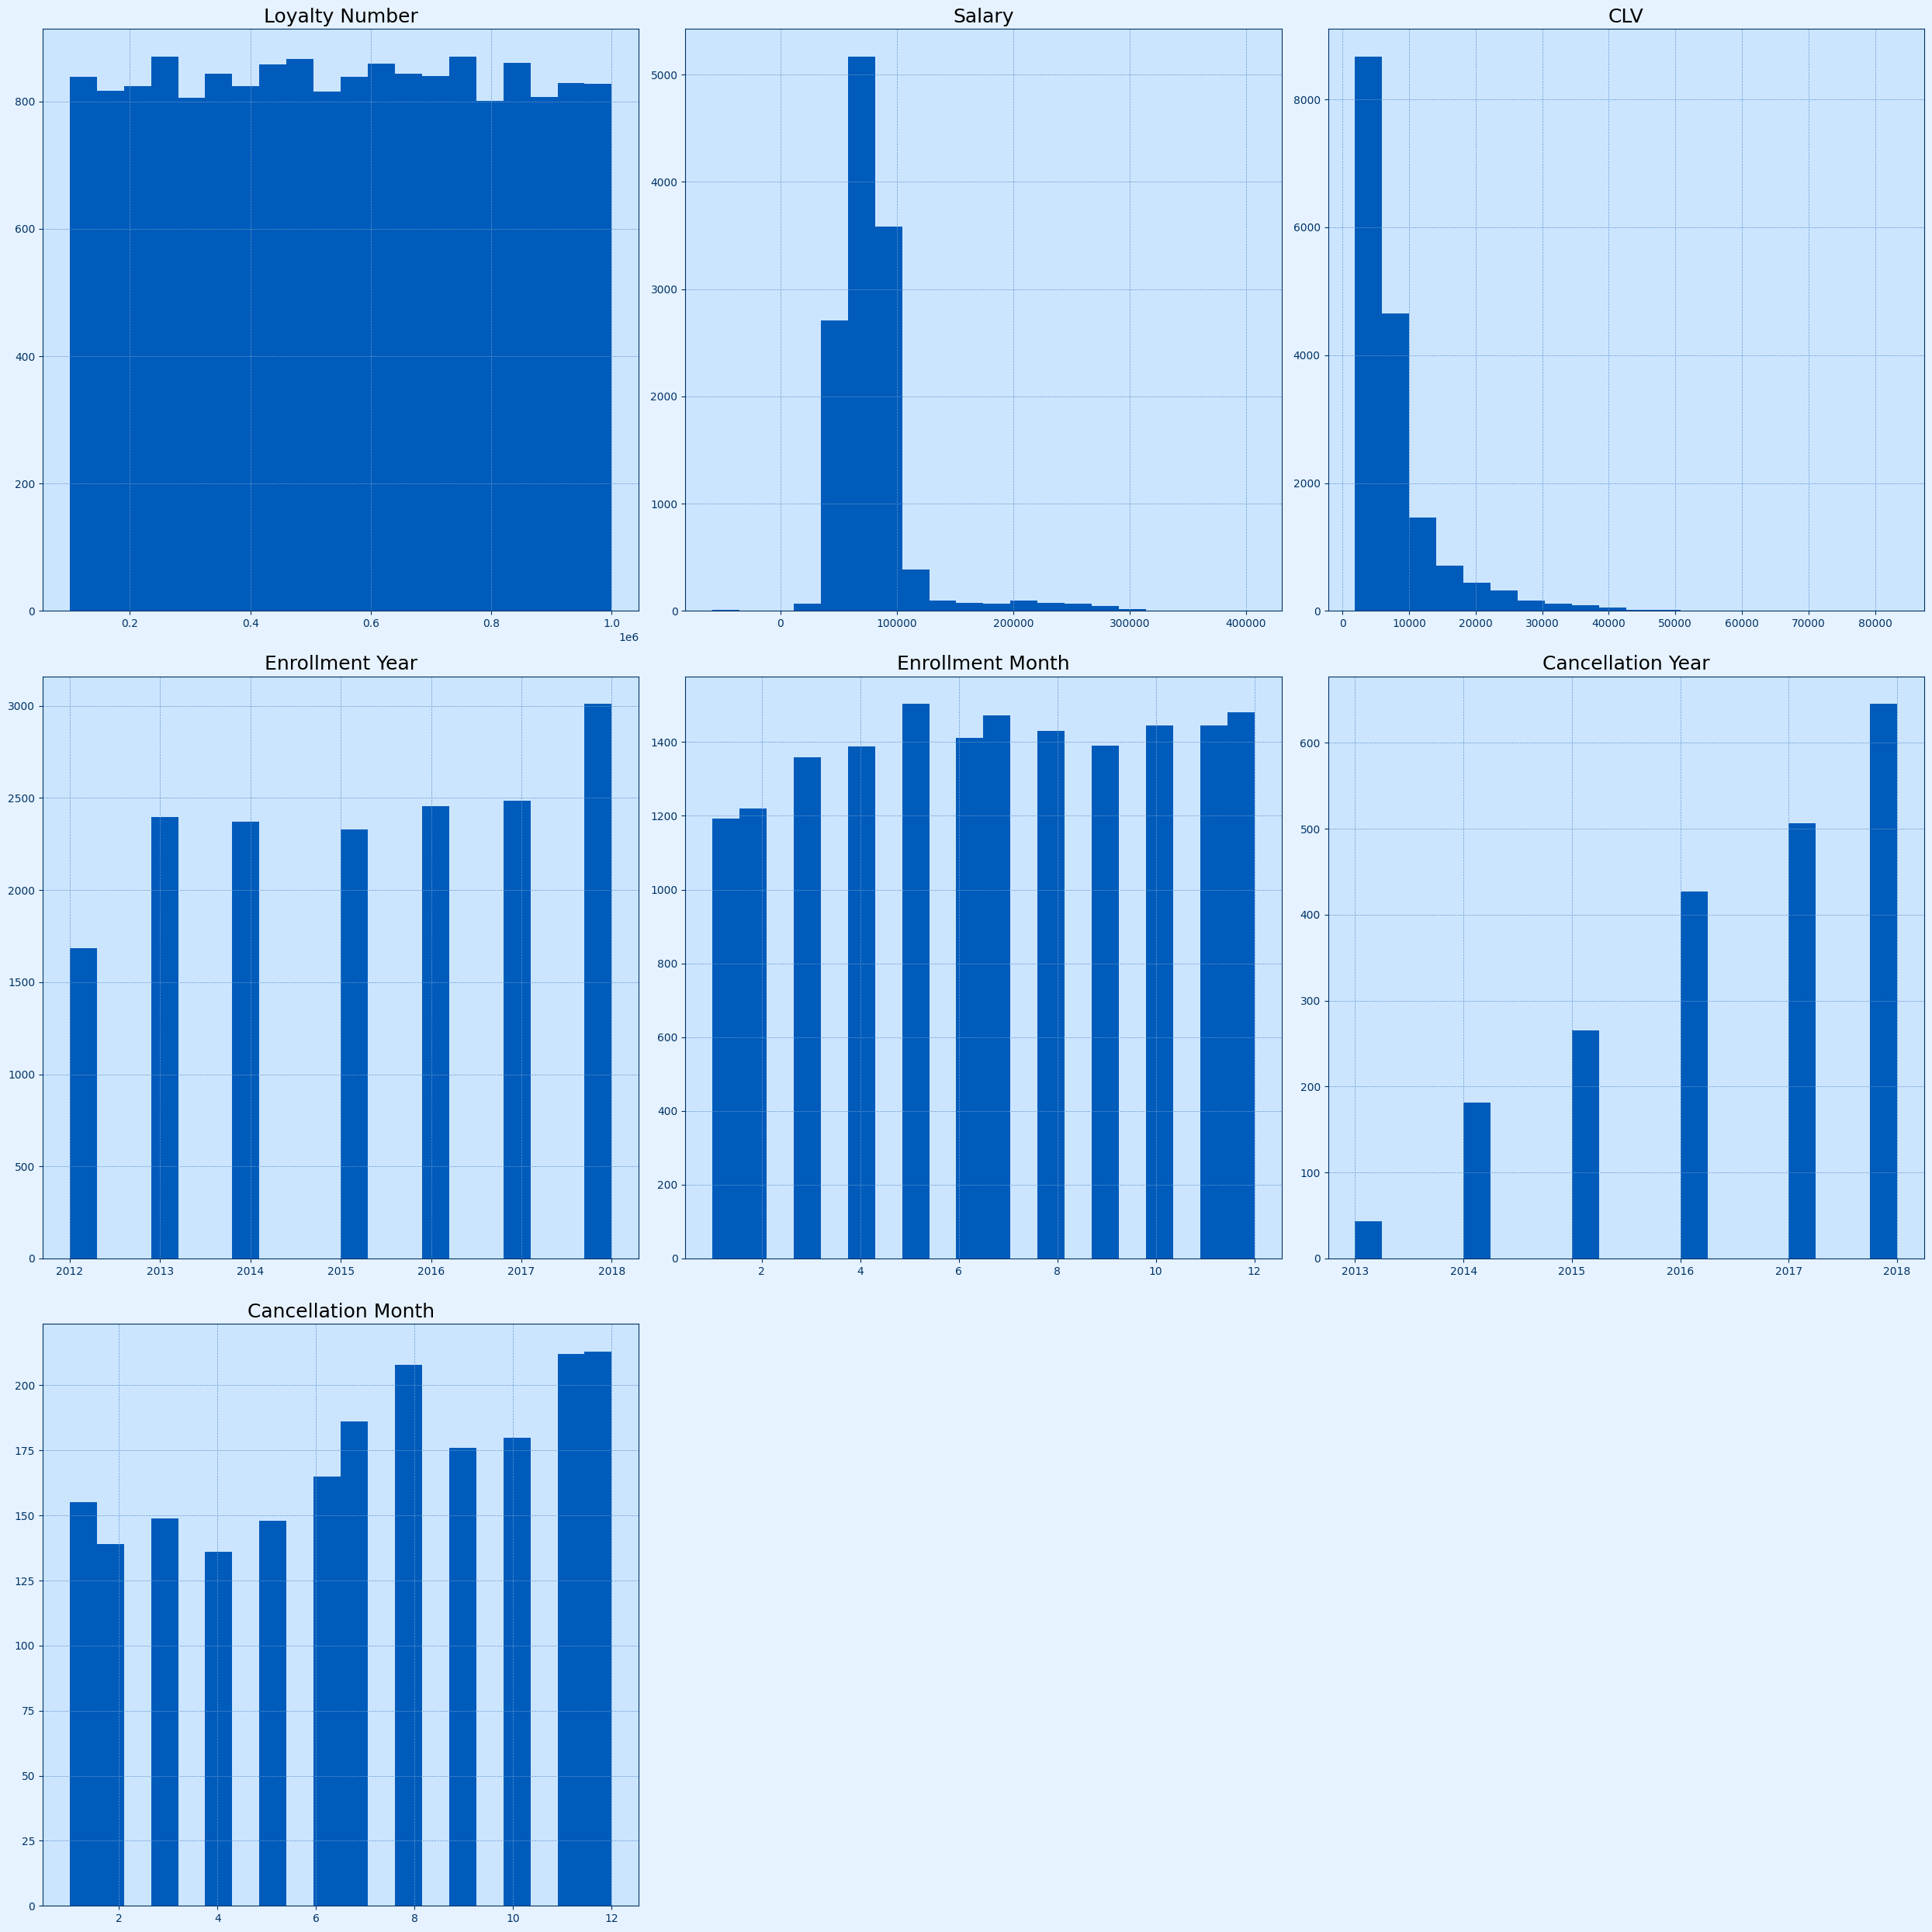

In [224]:
# Uso la función creada eda sobre los 2 df:

print(f'La información general de Flight Activity es:')
eda(df_fa)
print('-'*85)
print('-'*85)
print(f'La información general de Loyalty History es:')
eda(df_lh)

Filas iniciales:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN


----------------------------------------------------------------------------------
Filas finales:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN
405623,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


----------------------------------------------------------------------------------
Filas aleatorias:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
169875,146086,2017,11,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,70285.0,Single,Aurora,7057.46,Standard,2015,11,NaN,NaN
68937,171419,2017,5,11,0,11,2761,276.0,0,0,Canada,Nova Scotia,Halifax,B3C 2M8,Female,College,NaN,Single,Nova,7714.62,Standard,2016,9,NaN,NaN
212083,593885,2018,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,51525.0,Married,Aurora,5700.76,Standard,2018,11,NaN,NaN


----------------------------------------------------------------------------------
Número de filas:


405624

----------------------------------------------------------------------------------
Número de columnas:


25

----------------------------------------------------------------------------------
Información dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province   

None

----------------------------------------------------------------------------------
Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

----------------------------------------------------------------------------------
Descripción datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


----------------------------------------------------------------------------------
Descripción datos string:


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


----------------------------------------------------------------------------------
No hay datos de tipo fechas
----------------------------------------------------------------------------------
Cuantos datos únicos hay por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64

----------------------------------------------------------------------------------
Datos unicos de la Loyalty Number:
 Loyalty Number
678205    72
499874    48
411734    48
255475    48
528447    48
          ..
100590    24
100642    24
100644    24
100646    24
999891    24
Name: count, Length: 16737, dtype: int64

Datos unicos de la Year:
 Year
2017    202812
2018    202812
Name: count, dtype: int64

Datos unicos de la Month:
 Month
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: count, dtype: int64

Datos unicos de la Flights Booked:
 Flights Booked
0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

Datos unicos de la Flight

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

----------------------------------------------------------------------------------
Porcentajes de nulos en columnas numéricas:
Cancellation Month             87.657535
Cancellation Year              87.657535
Salary                         25.312112
Loyalty Number                  0.000000
Flights with Companions         0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Points Accumulated              0.000000
Distance                        0.000000
Total Flights                   0.000000
Points Redeemed                 0.000000
CLV                             0.000000
Dollar Cost Points Redeemed     0.000000
Enrollment Month                0.000000
Enrollment Year                 0.000000
dtype: float64
----------------------------------------------------------------------------------

Porcentajes de nulos en columnas categóricas:
Country            0.0
Province           0.0
City               0.0
Pos

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
42,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
227,112142,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Bachelor,93073.0,Single,Aurora,16272.74,Standard,2015,7,NaN,NaN
478,126100,2017,1,0,0,0,0,0.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Master,121261.0,Divorced,Nova,17790.41,Standard,2013,11,2014.0,7.0


------------------------------------------------------------------------------------
Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

------------------------------------------------------------------------------------
Distribución de las columnas numéricas:


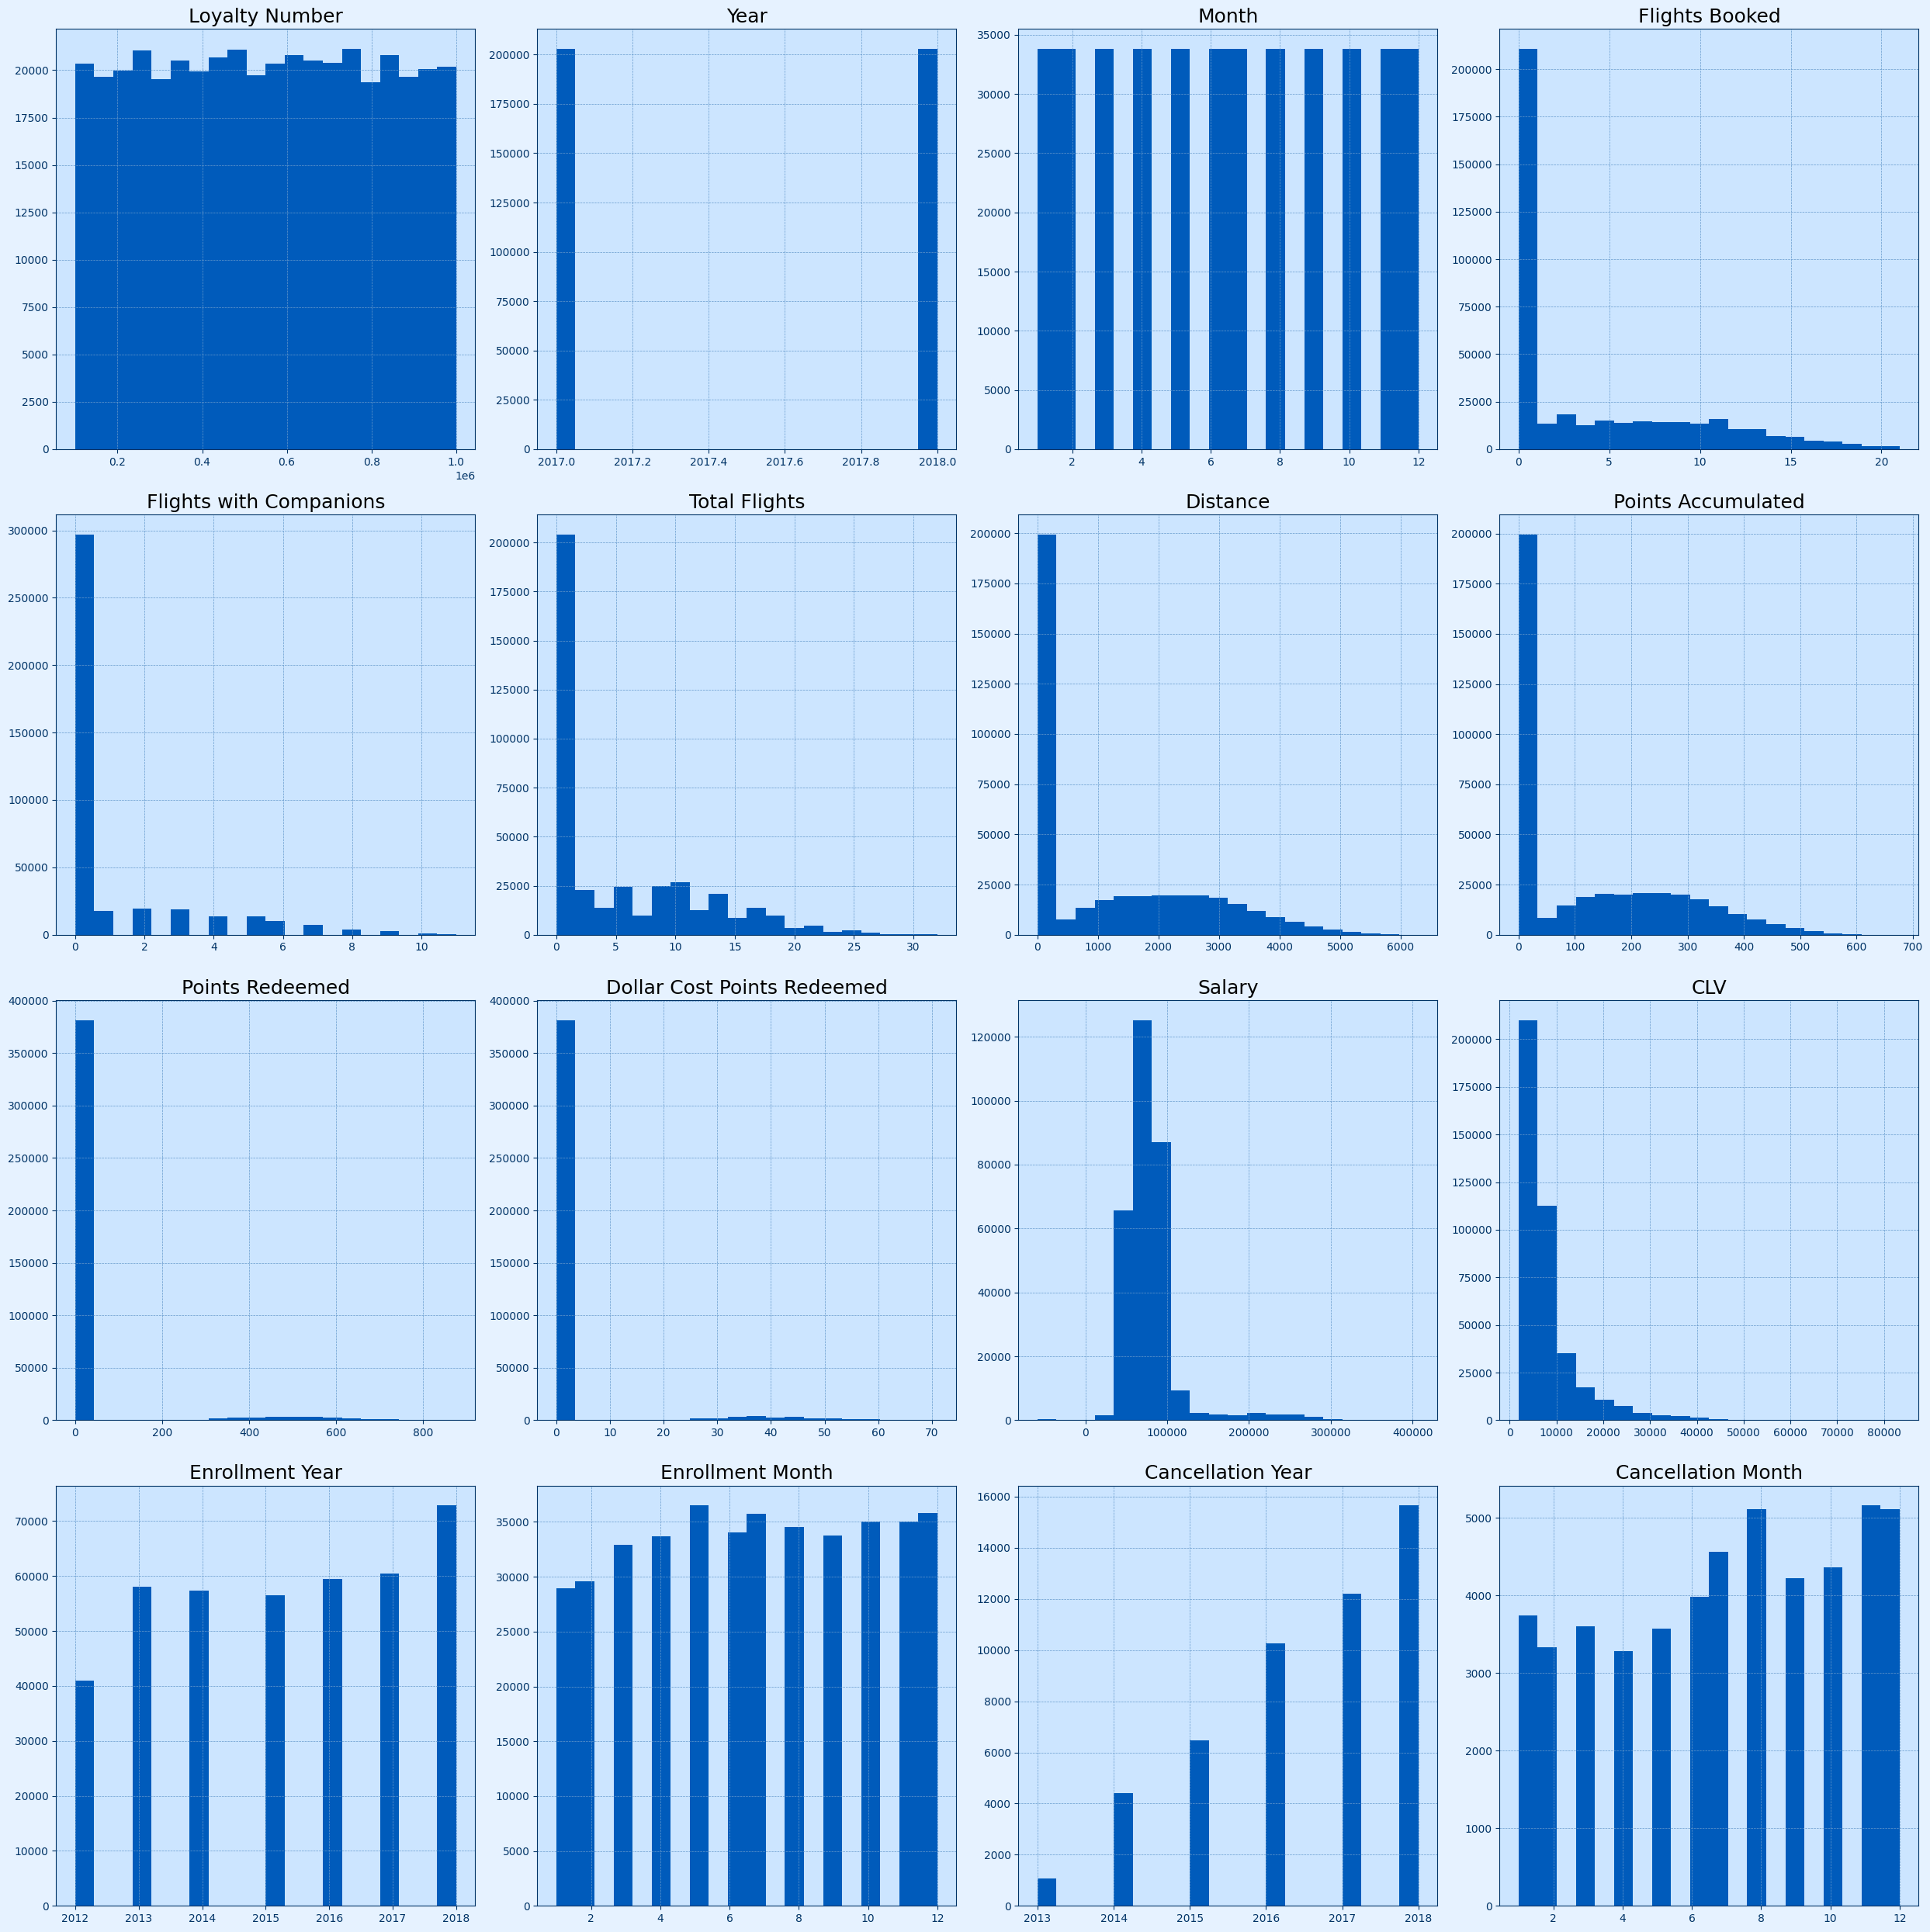

In [ ]:
# Une los dos conjuntos de datos de la forma más eficiente. 

df_completo = df_fa.merge(df_lh, how='inner', on='Loyalty Number')
eda(df_completo)

    2. Limpieza de Datos:

In [157]:
# Importo las librerias necesarias para la imputación de nulos:

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [158]:
# Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
# estén completos. 

# Elimino estas dos columnas por tener muchos nulos, más de 80%:

df_completo.drop(['Cancellation Month', 'Cancellation Year'], axis=1, inplace=True)
display(df_completo.head(1))


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8


In [159]:
# Imputo los nulos la columna salary con KNN ya que tiene más del 20% de nulos y no hay correlación entre las columnas:

imputer_KNN = KNNImputer(n_neighbors=5)
df_completo['Salary'] = imputer_KNN.fit_transform(df_completo[['Salary']])
print(df_completo['Salary'].nunique())

5891


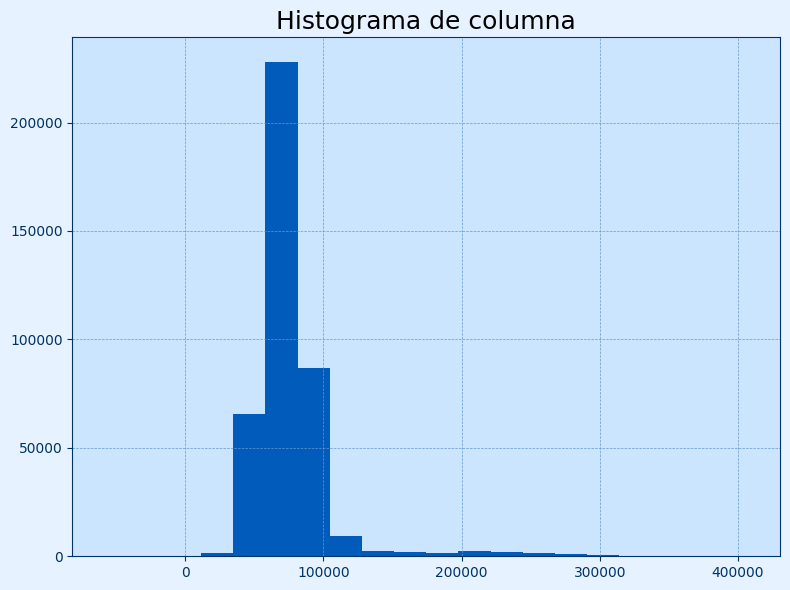

In [160]:
# Visualizo el hist de Salary para ver si los cambios han afectado mucho al original: COMPRUEBO QUE NO, TODO BIEN

fig, ax = plt.subplots(figsize=(8, 6))  
df_completo['Salary'].hist(bins=20, color='#005BBB', ax=ax)
fig.patch.set_facecolor('#E6F2FF')
ax.set_facecolor('#CCE5FF')
ax.set_title('Histograma de columna', fontsize=18)
ax.tick_params(colors='#003366')  # Color de ticks
ax.grid(color='#6699CC', linestyle='--', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_color('#003366')
plt.tight_layout()
plt.show()

In [161]:
# Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
# presenten de forma coherente.

print(df_completo.info())
display(df_completo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79268.825953,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79268.825953,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79268.825953,Married,Aurora,7290.07,Standard,2014,5
405620,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.000000,Single,Nova,8564.77,Standard,2012,8
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.000000,Married,Nova,20266.50,Standard,2017,7
405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,79268.825953,Married,Star,2631.56,Standard,2018,7


In [195]:
# Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
# datos) para garantizar la adecuación de los datos para el análisis estadístico.

# Exploro de nuevo datos unicos del nuevo df y saco max y min de sus columnas numéricas:

for col in df_completo:
    print(f'La columna {col} tiene los siguientes valores unicos:')
    print(df_completo[col].unique())
    print('-'*80)

columnas_num = df_completo.select_dtypes(include='number')
for col in columnas_num:
    print(f'El máximo de la columna {col} es: {columnas_num[col].max()}')
    print(f'El mínimo de la columna {col} es: {columnas_num[col].min()}')
    print('-'*80)

# Cambio los valores negativos de Salary a positivos, ya que en la revisióm, veo que de mínimo hay un negativo:

df_completo['Salary'] = df_completo['Salary'].abs()
print(f'El mínimo de la columna Salary tras modificar los negativos es: {df_completo['Salary'].min()}')  # Confirmo que ya no hay negativos
print('-'*80)

# Exploro los duplicados de nuevo:

cant_duplicados = df_completo.duplicated().sum()
print(f'La cantidad de duplicados actual en el df es: {cant_duplicados}')
print('-'*80)

# Elimino todas las filas duplicadas, quedandome con la original y vuelvo a imprimir los duplicados para verificar:

df_completo_limpio = df_completo.drop_duplicates()
cant_duplicados1 = df_completo_limpio.duplicated().sum()
print(f'La cantidad de duplicados tras tratarlos es: {cant_duplicados1}')

La columna Loyalty Number tiene los siguientes valores unicos:
[100018 100102 100140 ... 999731 999788 999891]
--------------------------------------------------------------------------------
La columna Year tiene los siguientes valores unicos:
[2017 2018]
--------------------------------------------------------------------------------
La columna Month tiene los siguientes valores unicos:
[ 1  9  2  3 11  4  5  7  6  8 10 12]
--------------------------------------------------------------------------------
La columna Flights Booked tiene los siguientes valores unicos:
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
--------------------------------------------------------------------------------
La columna Flights with Companions tiene los siguientes valores unicos:
[ 0  4  7  1  6  3  5  2 10  8  9 11]
--------------------------------------------------------------------------------
La columna Total Flights tiene los siguientes valores unicos:
[ 3 14  6  0 15 11 12 10

### Fase 2: Visualización

In [196]:
# Importo la biblioteca que falta para la visualización de datos:

import seaborn as sns

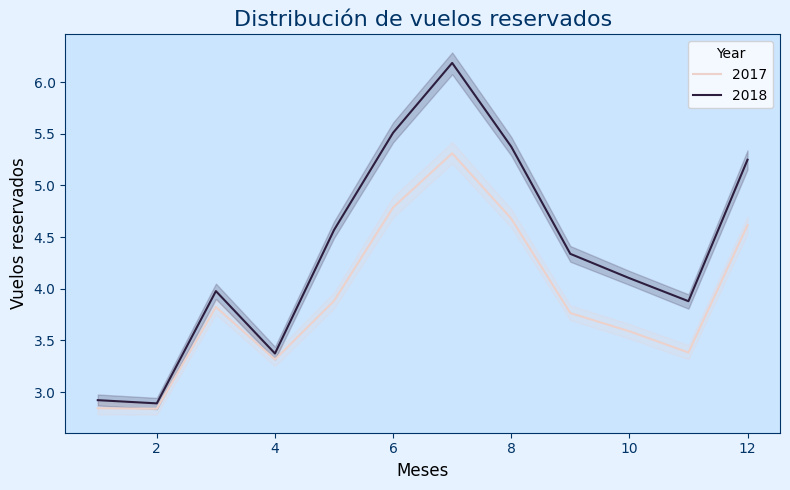

In [197]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Creo y personalizo un gráfico de scatterplot con seaborn:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Flights Booked', hue='Year', data=df_completo_limpio, color='navy')
plt.gca().set_facecolor('#CCE5FF')  
plt.gcf().set_facecolor('#E6F2FF')  
plt.tick_params(colors='#003366')
for spine in plt.gca().spines.values():
    spine.set_color('#003366')
plt.title('Distribución de vuelos reservados', fontsize=16, color='#003366')
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Vuelos reservados', fontsize=12)
plt.tight_layout()
plt.show()

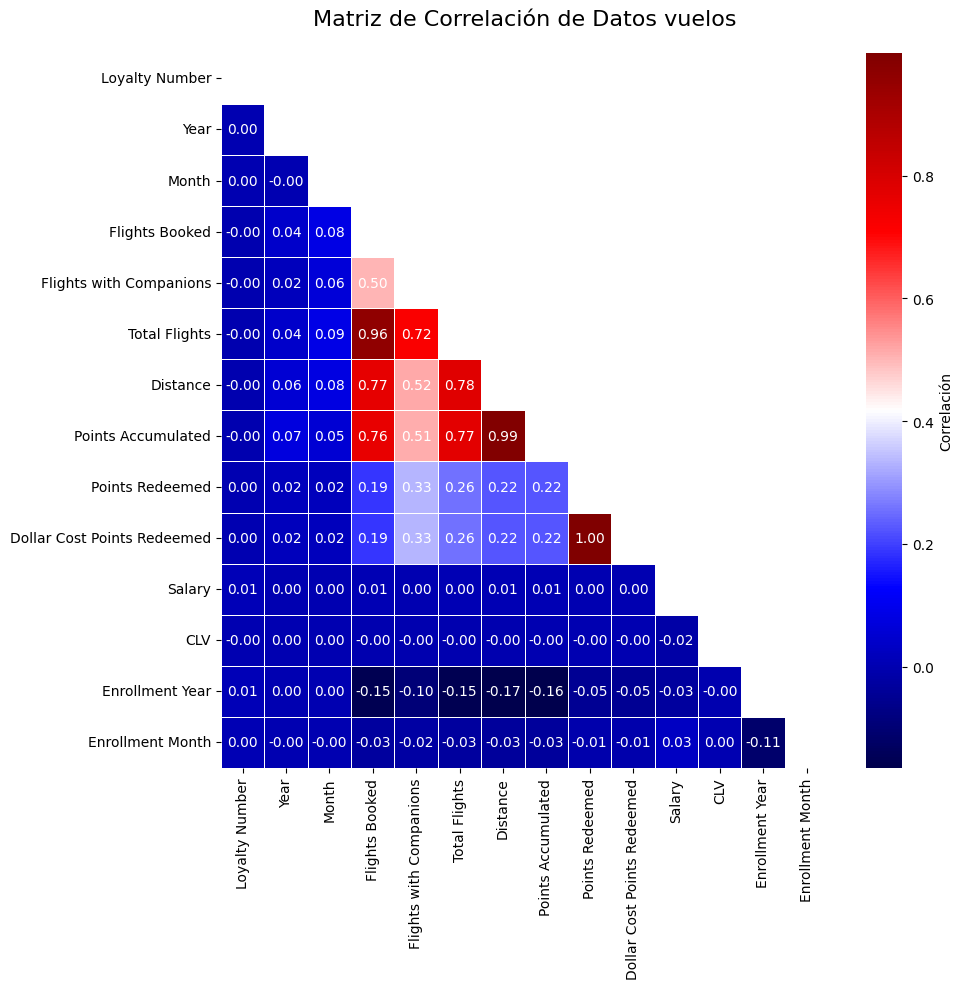

In [198]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

# Creo una variable con la correlación del df para hacer un gráfico de mapa de correlación y lo personalizo:
df_completo_corr = df_completo_limpio.select_dtypes(include=['number']).corr()
# Creo una mascara para visualizar solo la mitad del mapa:
mascara = np.triu(np.ones_like(df_completo_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 10))  
sns.heatmap(df_completo_corr, cmap='seismic', 
            annot=True,
            fmt='.2f',
            mask=mascara,
            linewidths=0.5,
            ax=ax,
            cbar_kws={'label': 'Correlación'},
            annot_kws={"color": "white"}     # Color del texto dentro de los cuadros
            )
ax.set_title("Matriz de Correlación de Datos vuelos", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

2. Las columnas distancia de los vuelos y puntos acumulados por los cliente tienen una relación muy fuerte, casi del 1. Lo que significa que contra más distancias recorren, más puntos acumulan.

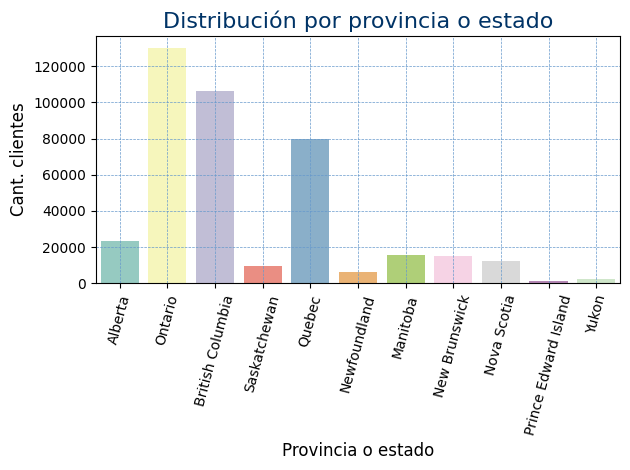

In [199]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

# Creo un gráfico personalizado de countplot para una mejor visualización de los datos, ya que hay muchos valores diferentes:
sns.countplot(data=df_completo_limpio, x='Province', palette='Set3') 
plt.title('Distribución por provincia o estado', fontsize=16, color='#003366')
plt.xlabel('Provincia o estado', fontsize=12)
plt.ylabel('Cant. clientes', fontsize=12)
plt.grid(color='#6699CC', linestyle='--', linewidth=0.5)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

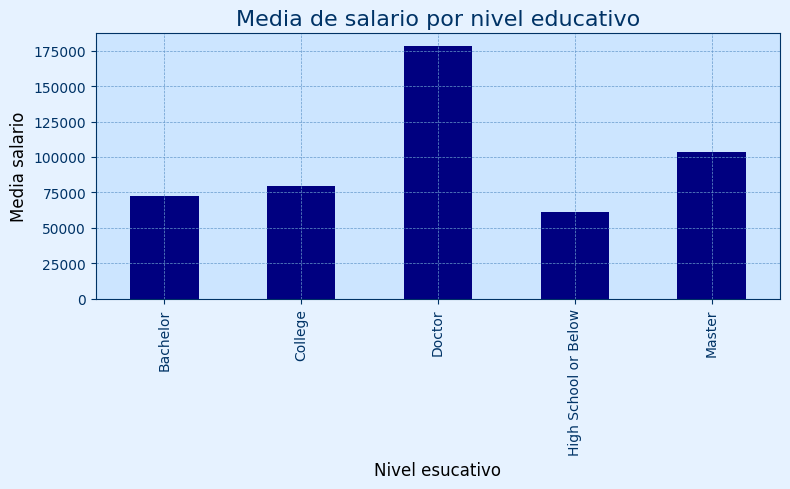

In [200]:
# 4.¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

#Hago una variable con la agrupación de salario medio por nivel educativo para usarla en el gráfico de barras:
medias_salarios = df_completo_limpio.groupby('Education')['Salary'].mean()
plt.figure(figsize=(8, 5))
medias_salarios.plot(kind='bar', color='navy')
plt.gca().set_facecolor('#CCE5FF')  
plt.gcf().set_facecolor('#E6F2FF')  
plt.grid(color='#6699CC', linestyle='--', linewidth=0.5)
plt.tick_params(colors='#003366')
for spine in plt.gca().spines.values():
    spine.set_color('#003366')

plt.title('Media de salario por nivel educativo', fontsize=16, color='#003366')
plt.xlabel('Nivel esucativo', fontsize=12)
plt.ylabel('Media salario', fontsize=12)
plt.tight_layout()
plt.show()

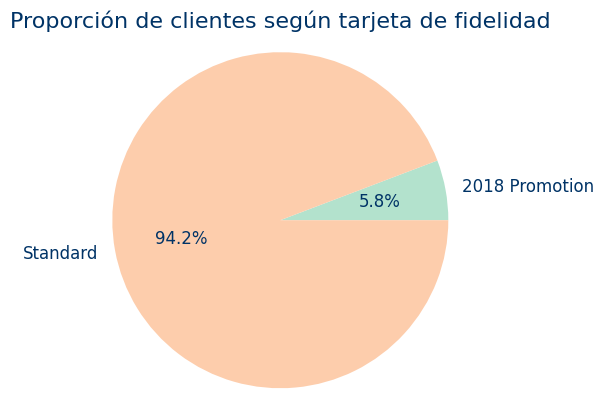

In [201]:
# 5.¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

# Creo una variable con el recuento de los valores de la columna ordenados para usarla en la creación 
# del gráfico de quesito personalizado:
recuento = df_completo_limpio['Enrollment Type'].value_counts().sort_index()
colores = sns.color_palette("Pastel2", 2)  # Creo una variable fuera del gráfico para poder usar color de seaborn
plt.pie(recuento.values, labels=recuento.index, autopct='%1.1f%%',  
        textprops={'color': '#003366', 'fontsize': 12}, colors=colores
        )  
plt.title('Proporción de clientes según tarjeta de fidelidad', fontsize=16, color='#003366')
plt.axis('equal')  # Para que el círculo sea perfecto
plt.show()

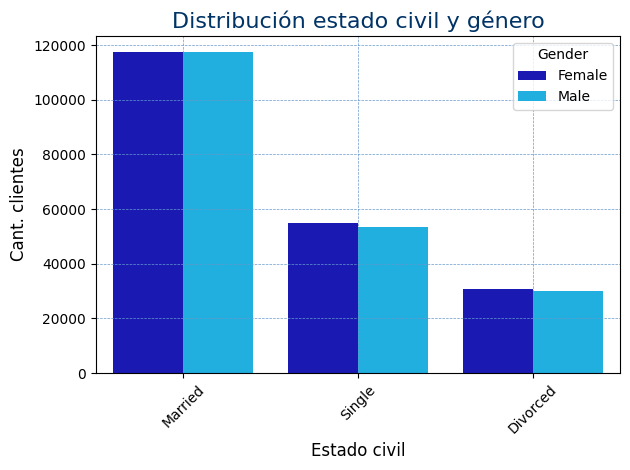

In [202]:
# 6.¿Cómo se distribuyen los clientes según su estado civil y género?

# Creo y personalizo un gráfico de conteo para una mejor visualización del objetivo de la query:
sns.countplot(data=df_completo_limpio, x='Marital Status', hue='Gender', palette=['mediumblue', 'deepskyblue']) 
plt.title('Distribución estado civil y género', fontsize=16, color='#003366')
plt.xlabel('Estado civil', fontsize=12)
plt.ylabel('Cant. clientes', fontsize=12)
plt.grid(color='#6699CC', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## BONUS
### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [203]:
# 1.Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
# 'Flights Booked' y 'Education'.

df_esp = df_completo_limpio[['Flights Booked', 'Education']]
display(df_esp)

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
405619,0,College
405620,0,Doctor
405621,3,Bachelor
405622,0,College


,mean,std,min,max,count
Education,,,,,
Bachelor,4.110288,5.221671,0,21,252567
College,4.169744,5.246040,0,21,102260
Doctor,4.175512,5.256971,0,21,17731
High School or Below,4.176209,5.239267,0,21,18915
Master,4.200700,5.213956,0,21,12287


--------------------------------------------------------------------------------
La frecuencia absoluta es:


Education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

--------------------------------------------------------------------------------
La frecuencia relativa es:


Education
Bachelor                62.553745
College                 25.326927
High School or Below     4.684714
Doctor                   4.391470
Master                   3.043144
Name: proportion, dtype: float64

--------------------------------------------------------------------------------
La tabla de frecuencias es:


,Nivel educación,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Bachelor,252567,62.553745
1,College,102260,25.326927
2,High School or Below,18915,4.684714
3,Doctor,17731,4.391470
4,Master,12287,3.043144


--------------------------------------------------------------------------------


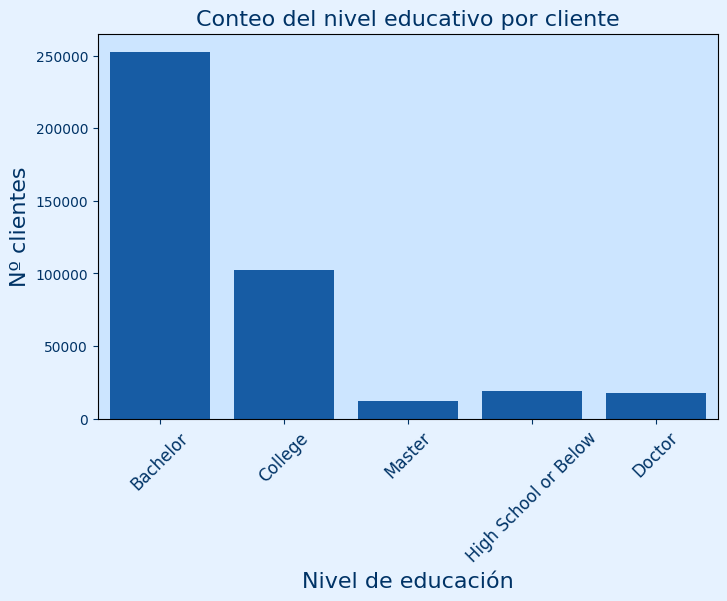

--------------------------------------------------------------------------------


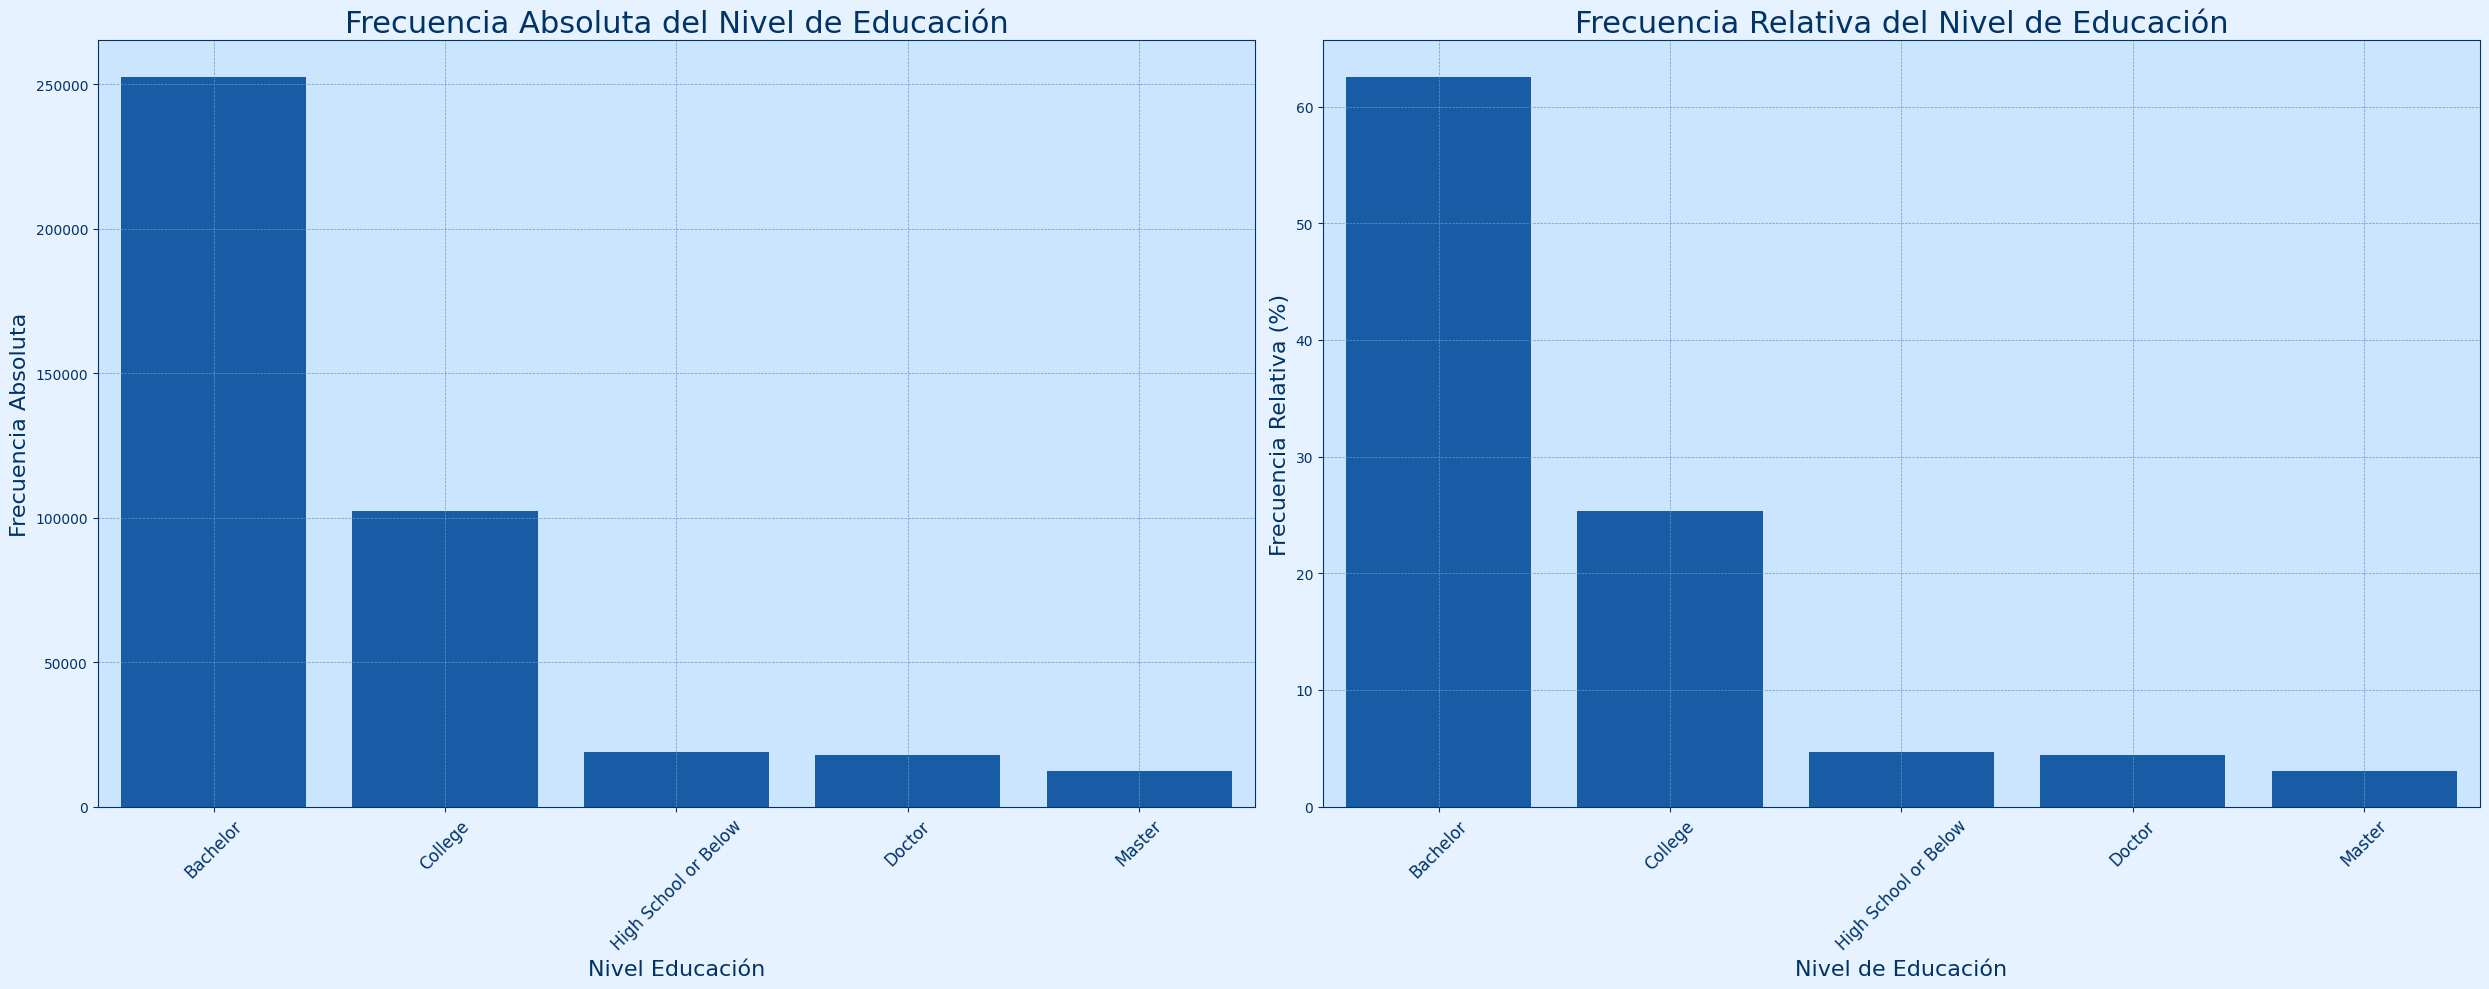

In [204]:
# 2.Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
# básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
# grupo.

df_agrupado = df_esp.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'min', 'max', 'count'])
display(df_agrupado)
print('-'*80)

df_esp_frec_absoluta = df_esp['Education'].value_counts()
print(f'La frecuencia absoluta es:')
display(df_esp_frec_absoluta)
print('-'*80)

df_esp_frec_relativa = df_esp['Education'].value_counts(normalize=True) * 100
print('La frecuencia relativa es:')
display(df_esp_frec_relativa)
print('-'*80)

df_esp_frecuencias = pd.DataFrame({
                    'Nivel educación': df_esp_frec_absoluta.index,
                    'Frecuencia Absoluta': df_esp_frec_absoluta.values,
                    'Frecuencia Relativa (%)': df_esp_frec_relativa.values
                    })
print('La tabla de frecuencias es:')
display(df_esp_frecuencias)
print('-'*80)

# Creo y personalizo un gráfico de barras de conteo para ver la cantidad de clientes por nivel educativo:
fig, ax = plt.subplots(figsize=(8, 5), facecolor='#E6F2FF')
sns.countplot(x='Education', data=df_esp, color='#005BBB', ax=ax)
ax.set_facecolor('#CCE5FF')
plt.xticks(rotation=45, size=12)
plt.title('Conteo del nivel educativo por cliente', fontsize=16, color='#003366')
plt.xlabel('Nivel de educación', fontsize=16, color='#003366')
plt.ylabel('Nº clientes', fontsize=16, color='#003366')
ax.tick_params(colors='#003366')
plt.show()
print('-'*80)

# Creo un subplot personalizado para visualizar las dos gráficas de frecuencias:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10)) 
fig.patch.set_facecolor('#E6F2FF')
axes = axes.flatten()

# Gráfico de barras para la frecuencia absoluta:
sns.barplot(x='Nivel educación', y='Frecuencia Absoluta', data=df_esp_frecuencias, ax=axes[0], color='#005BBB')
axes[0].set_title('Frecuencia Absoluta del Nivel de Educación', fontsize=16, color='#003366')
axes[0].set_xlabel('Nivel Educación', fontsize=16, color='#003366')
axes[0].set_ylabel('Frecuencia Absoluta', fontsize=16, color='#003366')
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

# Gráfico de barras para la frecuencia relativa:
sns.barplot(x='Nivel educación', y='Frecuencia Relativa (%)', data=df_esp_frecuencias, ax=axes[1], color='#005BBB')
axes[1].set_title('Frecuencia Relativa del Nivel de Educación', fontsize=16, color='#003366')
axes[1].set_xlabel('Nivel de Educación', fontsize=16, color='#003366')
axes[1].set_ylabel('Frecuencia Relativa (%)', fontsize=16, color='#003366')
axes[1].tick_params(axis='x', rotation=45, labelsize=12) 

for ax in axes:
    ax.set_facecolor('#CCE5FF')   
    ax.title.set_fontsize(22)
    ax.tick_params(colors='#003366')   
    ax.grid(color='#6699CC', linestyle='--', linewidth=0.5) 
    for spine in ax.spines.values():  
        spine.set_color('#003366')

plt.tight_layout() 
plt.show()


In [205]:
# Importo las bibliotecas necesarias para realizar hipótesis:

import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import levene, bartlett, shapiro
import warnings
warnings.filterwarnings("ignore")

3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.  

  1a parte; Planteamiento de la hipótesis:  
     H0 = NO hay diferencia significativa entre en el número de vuelos reservados y los diferentes niveles educativos.  
     H1 = SÍ hay diferencia significativa entre en el número de vuelos reservados y los diferentes niveles educativos.

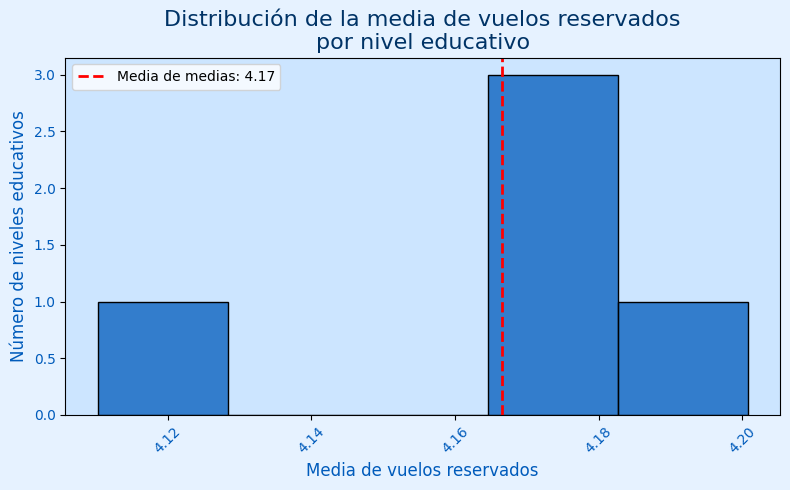

--------------------------------------------------------------------------------
La desviación estándar es:
Education
Bachelor                5.221671
College                 5.246040
Doctor                  5.256971
High School or Below    5.239267
Master                  5.213956
Name: Flights Booked, dtype: float64
--------------------------------------------------------------------------------


In [206]:
# 3.Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
# significativa en el número de vuelos reservados entre los diferentes niveles educativos.

# 1a parte; Planteamiento de la hipotesis:
    # H0 = NO hay diferencia significativa entre en el número de vuelos reservados y los diferentes niveles educativos.
    # H1 = SÍ hay diferencia significativa entre en el número de vuelos reservados y los diferentes niveles educativos.

# 2a parte; Cálculo de métricas:

# Creo dos variables para las medias para el gráfico de hist:
media = df_esp.groupby('Education')['Flights Booked'].mean()
media_media = media.mean()

plt.figure(figsize=(8, 5), facecolor='#E6F2FF')
ax = plt.gca()
ax.set_facecolor('#CCE5FF')
# Creo gráfica de histograma de las medias:
sns.histplot(media, bins=len(media), color='#005BBB', edgecolor='black', ax=ax)
# Creo la línea vertical en la media:
plt.axvline(media_media,
            color='red',
            linestyle='dashed',
            linewidth=2,
            label=f'Media de medias: {media_media:.2f}')
plt.title('Distribución de la media de vuelos reservados\npor nivel educativo',
          fontsize=16, color='#003366')
plt.xlabel('Media de vuelos reservados', fontsize=12, color='#005BBB')
plt.ylabel('Número de niveles educativos', fontsize=12, color='#005BBB')
plt.legend()
plt.xticks(rotation=45, fontsize=10, color='#005BBB')
plt.yticks(fontsize=10, color='#005BBB')
plt.tight_layout()
plt.show()
print('-'*80)

# Creo variable para la desviación estándar:
desviación = df_esp.groupby('Education')['Flights Booked'].std()
print(f'La desviación estándar es:\n{desviación}')
print('-'*80)


In [207]:
# 3a parte; Elección de nivel de significancia:

nivel_significancia = 0.5

In [208]:
# 4a parte: Comprobación de condiciones:

# Función para la prueba de normalidad:
def prueba_normalidad(data):
    n = len(data)
    # Condición para elegir la prueba
    if n <= 5000:
        # Usar Shapiro-Wilk para muestras pequeñas y medianas
        test_name = "Shapiro-Wilk"
        stat, p_value = shapiro(data)
    else:
        # Usar Kolmogorov-Smirnov para muestras grandes
        test_name = "Kolmogorov-Smirnov"
        stat, p_value = kstest(data, 'norm')
    # Decisión sobre la hipótesis nula
    if p_value > 0.05:
        decision = "No se rechaza H0: Los datos parecen seguir una distribución normal."
    else:
        decision = "Se rechaza H0: Los datos no siguen una distribución normal."
    # Retornar los resultados
    return f"""
    Prueba: {test_name}
    Estadístico: {stat:.4f}
    p-value: {p_value:.4f}
    Decisión: {decision}
    """

In [209]:
# Agrupo las reservas de vuelos por niveles educativos:
agrupacion_niveles = df_esp.groupby('Education')['Flights Booked']

# Itero por cada nivel y su valor para realizar la prueba de normalidad con cada par de ellos:
for nivel, datos_nivel in agrupacion_niveles:
    resultado_normalidad = prueba_normalidad(datos_nivel.tolist())  # Los convierto a lista para la función lo acepte
    print(f"Nivel educativo: {nivel}")
    print(f"Resultado prueba normalidad: {resultado_normalidad}")
    print('-'*80)

Nivel educativo: Bachelor
Resultado prueba normalidad: 
    Prueba: Kolmogorov-Smirnov
    Estadístico: 0.5000
    p-value: 0.0000
    Decisión: Se rechaza H0: Los datos no siguen una distribución normal.
    
--------------------------------------------------------------------------------
Nivel educativo: College
Resultado prueba normalidad: 
    Prueba: Kolmogorov-Smirnov
    Estadístico: 0.5000
    p-value: 0.0000
    Decisión: Se rechaza H0: Los datos no siguen una distribución normal.
    
--------------------------------------------------------------------------------
Nivel educativo: Doctor
Resultado prueba normalidad: 
    Prueba: Kolmogorov-Smirnov
    Estadístico: 0.5000
    p-value: 0.0000
    Decisión: Se rechaza H0: Los datos no siguen una distribución normal.
    
--------------------------------------------------------------------------------
Nivel educativo: High School or Below
Resultado prueba normalidad: 
    Prueba: Kolmogorov-Smirnov
    Estadístico: 0.5000
    p-v

In [210]:
df_esp['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [211]:
# Importo la libreria necesaria para poder hacer combinaciones de grupos:
from itertools import combinations

In [212]:
# 4a parte: Comprobación de condiciones:

# Creo un diccionario con cada grupo por nivel educativo y reservas de vuelos:
grupos = {'Bachelor': df_esp[df_esp['Education']=='Bachelor']['Flights Booked'],
        'College': df_esp[df_esp['Education']=='College']['Flights Booked'],
        'Master': df_esp[df_esp['Education']=='Master']['Flights Booked'],
        'High School or Below': df_esp[df_esp['Education']=='High School or Below']['Flights Booked'],
        'Doctor': df_esp[df_esp['Education']=='Doctor']['Flights Booked']
        }

# Función para la prueba de Homogeneidad de Varianza, uso Levenne por no tener datos con distribución normal:
    # Modifico lo que se le pasa a la función para poder usar el diccionario:
def prueba_levene(grupo1, grupo2, nombre1, nombre2):
    # Comprobar la normalidad de ambos grupos
    test_name = "Levene"
    stat, p_value = levene(grupo1, grupo2)
    # Decisión sobre la hipótesis nula
    if p_value > 0.05:
        decision = "No se rechaza H0: Las varianzas son homogéneas."
    else:
        decision = "Se rechaza H0: Las varianzas no son homogéneas."

    # Retornar los resultados
    return f"""
    Comparación: {nombre1} vs {nombre2}
    Prueba: {test_name}
    Estadístico: {stat:.4f}
    p-value: {p_value:.4f}
    Decisión: {decision}
    """

# Itero sobre cada combinación posible de los grupos y realizo la prueba Levenne en cada uno de ellos:
for (nombre1, grupo1), (nombre2, grupo2) in combinations(grupos.items(), 2):
    resultado = prueba_levene(grupo1, grupo2, nombre1, nombre2)
    print(resultado)
    print('-' * 80)


    Comparación: Bachelor vs College
    Prueba: Levene
    Estadístico: 8.9768
    p-value: 0.0027
    Decisión: Se rechaza H0: Las varianzas no son homogéneas.
    
--------------------------------------------------------------------------------

    Comparación: Bachelor vs Master
    Prueba: Levene
    Estadístico: 2.4400
    p-value: 0.1183
    Decisión: No se rechaza H0: Las varianzas son homogéneas.
    
--------------------------------------------------------------------------------

    Comparación: Bachelor vs High School or Below
    Prueba: Levene
    Estadístico: 1.9851
    p-value: 0.1589
    Decisión: No se rechaza H0: Las varianzas son homogéneas.
    
--------------------------------------------------------------------------------

    Comparación: Bachelor vs Doctor
    Prueba: Levene
    Estadístico: 2.2273
    p-value: 0.1356
    Decisión: No se rechaza H0: Las varianzas son homogéneas.
    
--------------------------------------------------------------------------

In [ ]:
# 5a parte; Selección del test

    # Aunque en algunos grupos las varianzas son homogéneas, usare el Test Mann Whitney porque ninguno tiene la 
    # distribución de los datos normales.

In [214]:
# Función del test de Mann Whitnney:

def test_mann_whitney(grupo1, grupo2, nombre1="Grupo 1", nombre2="Grupo 2"):
    nivel_significancia
    t_stat, p_valor = stats.mannwhitneyu(grupo1, grupo2)
    resultado = f'''
    Comparación: {nombre1} vs {nombre2}
    Estadístico: {t_stat},
    p-valor: {p_valor},
    Conclusión: {"Rechazamos H0 (Diferencias significativas)" 
    if p_valor < nivel_significancia else "No se rechaza H0 (No hay diferencias significativas)"}
    '''
    return resultado

for (nombre1, grupo1), (nombre2, grupo2) in combinations(grupos.items(), 2):
    resultado = test_mann_whitney(grupo1, grupo2, nombre1, nombre2)
    print(resultado)
    print('-' * 80)


    Comparación: Bachelor vs College
    Estadístico: 12834460862.5,
    p-valor: 0.002278100128804696,
    Conclusión: Rechazamos H0 (Diferencias significativas)
    
--------------------------------------------------------------------------------

    Comparación: Bachelor vs Master
    Estadístico: 1532540228.0,
    p-valor: 0.014056962299193064,
    Conclusión: Rechazamos H0 (Diferencias significativas)
    
--------------------------------------------------------------------------------

    Comparación: Bachelor vs High School or Below
    Estadístico: 2368160009.0,
    p-valor: 0.036000727159277525,
    Conclusión: Rechazamos H0 (Diferencias significativas)
    
--------------------------------------------------------------------------------

    Comparación: Bachelor vs Doctor
    Estadístico: 2223352413.5,
    p-valor: 0.09460787010212152,
    Conclusión: Rechazamos H0 (Diferencias significativas)
    
--------------------------------------------------------------------------

6a parte; Interpretación de resultados

La interpretación de los resultados me dice que hay 3 grupos que si afirman la hipótesis H1, y otros 7 que la desmienten, es decir las combinaciones de grupos: Bachelor vs College, Bachelor vs Master, Bachelor vs High School 
or Below SÍ tienen diferencias significativas, el resto de los grupos no las tienen.

CONCLUSIÓN: Solo aparecen diferencias significativas con los niveles que se evalúan con Bachillerato, excepto el 
nivel de Doctorado. El resto de niveles, no tienen diferencias significativas entre ellos.